## Imports

In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np

## Exploring and preparing the datasets about misogyny/gender 

### Jigsaw

Exploring the posts' annotations wrt specific sensitive social categories (the post is identified through 'id'; in this file there isn't the post's text)

In [2]:
jigsaw_annotation = pd.read_csv('/Users/Marta/CheckList - FBK/Evaluation_Datasets/Jigsaw/identity_individual_annotations.csv', index_col=None, header=0)
jigsaw_annotation

,id,worker,disability,gender,race_or_ethnicity,religion,sexual_orientation
0,59856,211,none,none,none,none,none
1,59856,683,intellectual_or_learning none,none,none,none,none
2,59856,8899,none,none,none,none,none
3,59856,67,none,none,none,none,none
4,239579,8900,none,none,none,none,none
...,...,...,...,...,...,...,...
2597360,6333923,2477,none,none,none,atheist,none
2597361,6333923,3488,none,none,none,none,none
2597362,6333923,805,none,none,none,atheist,none
2597363,6333923,2493,none,none,other,atheist,none


Visualizing separatly
* disability
* gender & sexual_orientation
* race_or_ethnicity	
* religion	

In [3]:
disability=jigsaw_annotation[(jigsaw_annotation.disability!='none')]
disability

,id,worker,disability,gender,race_or_ethnicity,religion,sexual_orientation
1,59856,683,intellectual_or_learning none,none,none,none,none
176,240813,8908,psychiatric_or_mental_illness,none,none,none,none
177,240813,967,psychiatric_or_mental_illness,none,none,none,none
178,240813,1709,psychiatric_or_mental_illness,none,none,none,none
179,240813,8910,psychiatric_or_mental_illness,none,none,none,none
...,...,...,...,...,...,...,...
2596728,6329399,454,psychiatric_or_mental_illness,none,none,none,none
2596730,6329399,541,psychiatric_or_mental_illness,none,none,none,none
2596875,6330362,3613,other,none,none,none,none
2597084,6331431,2135,other,male,none,christian,homosexual_gay_or_lesbian


In [4]:
ratial=jigsaw_annotation[(jigsaw_annotation.race_or_ethnicity!='none')]
ratial

,id,worker,disability,gender,race_or_ethnicity,religion,sexual_orientation
43,239852,422,none,none,asian,none,none
62,239980,8903,none,female,other,none,none
112,240528,1183,none,none,asian,none,none
113,240528,1950,none,none,asian,none,none
116,240528,1601,none,none,asian,none,none
...,...,...,...,...,...,...,...
2597326,6333563,303,none,none,other,none,none
2597331,6333584,9361,none,none,asian,none,none
2597332,6333584,5488,none,none,asian,none,none
2597333,6333584,501,none,none,asian,none,none


In [5]:
religious=jigsaw_annotation[(jigsaw_annotation.religion!='none')]
religious

,id,worker,disability,gender,race_or_ethnicity,religion,sexual_orientation
48,239853,1545,none,none,none,christian,none
51,239853,1688,none,none,none,christian,none
54,239853,715,none,none,none,other,none
58,239893,1168,none,none,none,christian,none
59,239893,8908,none,none,none,christian,none
...,...,...,...,...,...,...,...
2597359,6333923,4721,none,none,none,atheist,none
2597360,6333923,2477,none,none,none,atheist,none
2597362,6333923,805,none,none,none,atheist,none
2597363,6333923,2493,none,none,other,atheist,none


Exploring unique values in each column, in order to explore the items/types present in the macro-categories

In [6]:
jigsaw_annotation.disability.value_counts()

none                                                                     2533981
psychiatric_or_mental_illness                                              46462
intellectual_or_learning                                                    5092
physical                                                                    4659
other                                                                       3965
physical intellectual_or_learning psychiatric_or_mental_illness              764
physical psychiatric_or_mental_illness                                       748
physical intellectual_or_learning                                            465
intellectual_or_learning psychiatric_or_mental_illness                       317
other none                                                                   188
psychiatric_or_mental_illness none                                           138
psychiatric_or_mental_illness other                                          137
physical none               

In [7]:
jigsaw_annotation.gender.value_counts()

none                             1973921
female                            233569
male                              209166
male female                       137517
transgender                        30474
other                               2596
female transgender                  2503
male transgender                    2498
male female transgender             2280
male none                           1169
female none                          646
male female none                     221
transgender none                     218
other none                           190
male female other                     98
transgender other                     93
male other                            75
female other                          66
male female transgender other         22
female transgender none               11
female transgender other               9
male other none                        7
transgender other none                 4
male transgender other                 4
female other non

In [8]:
jigsaw_annotation.sexual_orientation.value_counts()

none                                                          2469388
homosexual_gay_or_lesbian                                       96340
heterosexual                                                     8792
homosexual_gay_or_lesbian bisexual                               6650
heterosexual homosexual_gay_or_lesbian                           6008
other                                                            4609
bisexual                                                         2865
homosexual_gay_or_lesbian bisexual other                          654
homosexual_gay_or_lesbian other                                   486
heterosexual homosexual_gay_or_lesbian bisexual                   469
homosexual_gay_or_lesbian none                                    301
heterosexual homosexual_gay_or_lesbian other                      148
other none                                                        145
heterosexual none                                                 136
heterosexual homosex

In [9]:
jigsaw_annotation.race_or_ethnicity.value_counts()

none                              2217610
white                              139319
black                               75821
asian                               43252
black white                         38059
latino                              29551
other                               21579
black asian                          5374
black white asian                    3853
black white latino                   3685
black latino                         3145
white other                          2345
white latino                         1909
white asian                          1851
black white asian latino             1671
asian other                          1287
black other                          1139
latino none                           955
black white other                     721
latino other                          720
black none                            656
white none                            511
asian latino                          485
black asian latino                

Moving to the training file

In [2]:
jigsaw_train_all = pd.read_csv('/Users/Marta/CheckList - FBK/Evaluation_Datasets/Jigsaw/train.csv', index_col=None, header=0)
jigsaw_train_all

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,59848,0.000000,"This is so cool. It's like, 'would you want yo...",0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
1,59849,0.000000,Thank you!! This would make my life a lot less...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
2,59852,0.000000,This is such an urgent design problem; kudos t...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
3,59855,0.000000,Is this something I'll be able to install on m...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
4,59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.000000,0.021277,0.872340,0.0,0.0,0.0,...,2006,rejected,0,0,0,1,0,0.0,4,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1804869,6333967,0.000000,"Maybe the tax on ""things"" would be collected w...",0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,399385,approved,0,0,0,0,0,0.0,0,4
1804870,6333969,0.000000,What do you call people who STILL think the di...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,399528,approved,0,0,0,0,0,0.0,0,4
1804871,6333982,0.000000,"thank you ,,,right or wrong,,, i am following ...",0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,399457,approved,0,0,0,0,0,0.0,0,4
1804872,6334009,0.621212,Anyone who is quoted as having the following e...,0.030303,0.030303,0.045455,0.621212,0.0,NaN,NaN,...,399519,approved,0,0,0,0,0,0.0,0,66


Keeping only the posts whose score is > 0 for: 
* black white asian latino other_race_or_ethnicity
* christian jewish muslim hindu buddhist atheist other_religion

and removing duplicate posts (if a post has a score > 0 in more than one of these selected columns)

In [3]:
hate_list = ['white', 'asian', 'latino', 'other_race_or_ethnicity',
            'christian', 'jewish', 'muslim', 'hindu', 'buddhist', 'atheist', 'other_religion']

jigsaw_hate=jigsaw_train_all[(jigsaw_train_all.black>0)] 

for item in hate_list:
    jigsaw_hate=jigsaw_hate.append(jigsaw_train_all[(jigsaw_train_all[item]>0)])

jigsaw_hate=jigsaw_hate.drop_duplicates(subset=['id'])

In [4]:
jigsaw_hate[['id','target','comment_text']]

,id,target,comment_text
275,240059,0.300000,"I'm not a conservative, but I am ashamed to be..."
489,240581,0.000000,"Although the food was pretty good, I had a str..."
516,240627,0.000000,"BJ, your suggestion that low income residents ..."
552,240700,0.000000,"When I was younger, college-age, I went throug..."
733,240985,0.000000,"Symbol of hate, targeted at African Americans,..."
...,...,...,...
1798620,6325518,0.000000,Sadly we'll never see it ever again! These two...
1800751,6328190,0.166667,"It's all distraction friend, ALL OF IT... Thos..."
1801372,6329095,0.000000,I would amend that to: Thank you for your many...
1802270,6330384,0.594595,This is one of the many reasons I don't buy in...


Keeping only columns that matters to us

In [5]:
jigsaw_hate = jigsaw_hate.rename(columns={'comment_text': 'text','target': 'hate'})
jigsaw_hate

,id,hate,text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
275,240059,0.300000,"I'm not a conservative, but I am ashamed to be...",0.000000,0.000000,0.100000,0.300000,0.0,0.0,0.0,...,32080,approved,0,0,0,1,0,0.000000,4,10
489,240581,0.000000,"Although the food was pretty good, I had a str...",0.000000,0.000000,0.000000,0.200000,0.0,0.0,0.0,...,32265,approved,0,0,0,0,0,0.000000,10,5
516,240627,0.000000,"BJ, your suggestion that low income residents ...",0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,32499,approved,0,0,0,0,0,0.000000,4,4
552,240700,0.000000,"When I was younger, college-age, I went throug...",0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,33344,approved,0,0,0,2,0,0.000000,6,4
733,240985,0.000000,"Symbol of hate, targeted at African Americans,...",0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,32833,approved,0,0,0,0,0,0.000000,10,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1798620,6325518,0.000000,Sadly we'll never see it ever again! These two...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,399085,approved,0,1,0,5,0,0.000000,6,4
1800751,6328190,0.166667,"It's all distraction friend, ALL OF IT... Thos...",0.166667,0.000000,0.166667,0.166667,0.0,0.0,0.0,...,399033,approved,0,0,0,0,0,0.166667,6,6
1801372,6329095,0.000000,I would amend that to: Thank you for your many...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,399297,approved,0,0,0,2,0,0.000000,6,4
1802270,6330384,0.594595,This is one of the many reasons I don't buy in...,0.013514,0.108108,0.175676,0.567568,0.0,0.0,0.0,...,399210,approved,0,0,0,4,0,0.000000,5,74


In [6]:
r4 = jigsaw_hate[['text','hate']]

In [7]:
r4

,text,hate
275,"I'm not a conservative, but I am ashamed to be...",0.300000
489,"Although the food was pretty good, I had a str...",0.000000
516,"BJ, your suggestion that low income residents ...",0.000000
552,"When I was younger, college-age, I went throug...",0.000000
733,"Symbol of hate, targeted at African Americans,...",0.000000
...,...,...
1798620,Sadly we'll never see it ever again! These two...,0.000000
1800751,"It's all distraction friend, ALL OF IT... Thos...",0.166667
1801372,I would amend that to: Thank you for your many...,0.000000
1802270,This is one of the many reasons I don't buy in...,0.594595


Mapping the score to 0 or 1 (binary encoding). The official competition considered each post with target >= 0.5 to be toxic (https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data?select=train.csv) but we noticed that we need a precise set, so we raised the score to 0.6.

In [8]:
r4['hate'] = np.where((r4['hate'] >= 0.6), 1, r4['hate'])
r4['hate'] = np.where((r4['hate'] < 0.6), 0, r4['hate'])
r4

/Users/Marta/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/Marta/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,text,hate
275,"I'm not a conservative, but I am ashamed to be...",0.0
489,"Although the food was pretty good, I had a str...",0.0
516,"BJ, your suggestion that low income residents ...",0.0
552,"When I was younger, college-age, I went throug...",0.0
733,"Symbol of hate, targeted at African Americans,...",0.0
...,...,...
1798620,Sadly we'll never see it ever again! These two...,0.0
1800751,"It's all distraction friend, ALL OF IT... Thos...",0.0
1801372,I would amend that to: Thank you for your many...,0.0
1802270,This is one of the many reasons I don't buy in...,0.0


For now, because these texts are from a different genres than the others (social media posts, mainly from Twitter) we don't use them when building the test's suite for Automatic Misogyny Detection. The texts from Jigsaw are long, often well structured, no emojis or unusual punctuation or slang spelling grammar. 

In [9]:
r4.to_csv('/Users/Marta/CheckList - FBK/Evaluation_Datasets/Hate_Jigsaw.csv')

### HateSpeech Waasem

We already pre-processed the json data and fixed some rows

In [10]:
#json_path= '/Users/Marta/CheckList - FBK/Evaluation_Datasets/hatespeech/sexism.json'
#r3=pd.read_json(json_path, orient = 'records', lines=True)
#r3 = r3.drop(['Annotation','id_str','place','id','source','favorite_count','retweeted','in_reply_to_user_id','in_reply_to_status_id_str','in_reply_to_user_id_str','contributors','in_reply_to_status_id','user','created_at','retweet_count','in_reply_to_screen_name','geo','entities','coordinates','favorited','truncated','lang','is_quote_status','possibly_sensitive_appealable','possibly_sensitive','extended_entities','retweeted_status'], axis='columns')
#r3['misogynous']=1
r3=pd.read_excel('/Users/Marta/CheckList - FBK/Evaluation_Datasets/hatespeech/racist.xlsx', index_col=None, header=None)

In [11]:
r3 = r3.rename(columns={0: 'text'})
r3['hate']=1
r3

,text,hate
0,"""@_d_n_verg_ @stevesalaita Nothing has any va...",1
1,"""@_d_n_verg_ @stevesalaita Palestinians are h...",1
2,"""@_d_n_verg_ @stevesalaita The filth of the P...",1
3,"""@_enzk @NNdabbour64 And if someone wants to ...",1
4,"""@_enzk @NNdabbour64 Most people who become M...",1
...,...,...
1455,"""Whatever happens in #Yemen",1
1456,"""Why do these so called Moderate Muslims neve...",1
1457,"""Why would anyone loan money to Greece when t...",1
1458,"""Will any of the media talking heads ever bro...",1


In [12]:
r3.to_csv('/Users/Marta/CheckList - FBK/Evaluation_Datasets/Hate_Waasem.csv')

### HatEval 

We select only posts with target = misogyny and language = english. Then we keep only the colomns that matters to us

In [13]:
h = pd.read_csv('/Users/Marta/CheckList - FBK/Evaluation_Datasets/2019hateval/hateval2019_target.csv', index_col=None, header=0)
r0 = h[(h.target == "mig") & (h.language == 'en')].rename(columns={'HS': 'hate'})
r0 = r0.drop(['id', 'target', 'language', 'set', 'TR', 'AG'], axis='columns')
r0

,text,hate
0,"Hurray, saving us $$$ in so many ways @potus @...",1
1,Why would young fighting age men be the vast m...,1
2,@KamalaHarris Illegals Dump their Kids at the ...,1
3,NY Times: 'Nearly All White' States Pose 'an A...,0
4,Orban in Brussels: European leaders are ignori...,0
...,...,...
11494,"@RealJamesWoods Uh, well- Too Bad. #IllegalAli...",0
11495,@DRUDGE_REPORT Do you mean #illegalalien or #I...,0
11496,@RealJamesWoods If our government can use the ...,0
11497,@RealJamesWoods I'm sure glad I didn't just ca...,0


In [14]:
r0.to_csv('/Users/Marta/CheckList - FBK/Evaluation_Datasets/Hate_HatEval.csv')

### SBF

In [15]:
s0=[]
s1 = pd.read_csv('/Users/Marta/CheckList - FBK/Evaluation_Datasets/SocialBiasFrames_v2/SBFv2.dev.csv', index_col=None, header=0)
s2 = pd.read_csv('/Users/Marta/CheckList - FBK/Evaluation_Datasets/SocialBiasFrames_v2/SBFv2.trn.csv', index_col=None, header=0)
s3 = pd.read_csv('/Users/Marta/CheckList - FBK/Evaluation_Datasets/SocialBiasFrames_v2/SBFv2.tst.csv', index_col=None, header=0) 
s0.append(s1)
s0.append(s2)
s0.append(s3)
s = pd.concat(s0, axis=0, ignore_index=True)

In [16]:
s

,whoTarget,intentYN,sexYN,sexReason,offensiveYN,annotatorGender,annotatorMinority,sexPhrase,speakerMinorityYN,WorkerId,HITId,annotatorPolitics,annotatorRace,annotatorAge,post,targetMinority,targetCategory,targetStereotype
0,1.0,1.00,0.0,NaN,1.0,woman,NaN,NaN,0.0,2428559182657536645,3Z8UJEJOCZ74QHXOTFP0JOOGD7039J,liberal,white,29.0,Every half-breed cop in America is trying to r...,police officers,social,rape women
1,1.0,1.00,0.0,NaN,1.0,woman,NaN,NaN,0.0,2428559182657536645,3Z8UJEJOCZ74QHXOTFP0JOOGD7039J,liberal,white,29.0,Every half-breed cop in America is trying to r...,police officers,social,NaN
2,1.0,1.00,1.0,rape,1.0,woman,women,rape white women,0.0,7162172225567546910,3Z8UJEJOCZ74QHXOTFP0JOOGD7039J,liberal,white,27.0,Every half-breed cop in America is trying to r...,mixed folks,race,mixed folks are rapists.
3,1.0,1.00,1.0,rape,1.0,woman,women,rape white women,0.0,7162172225567546910,3Z8UJEJOCZ74QHXOTFP0JOOGD7039J,liberal,white,27.0,Every half-breed cop in America is trying to r...,mixed folks,race,mixed folks like white women.
4,1.0,1.00,1.0,rape,1.0,woman,women,rape white women,0.0,7162172225567546910,3Z8UJEJOCZ74QHXOTFP0JOOGD7039J,liberal,white,27.0,Every half-breed cop in America is trying to r...,cops,social,cops can't be trusted.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147134,1.0,0.00,0.0,NaN,1.0,man,NaN,NaN,0.0,7891575995618716029,39O6Z4JLX2RE3MH5G51KIM2HDSKXVR,mod-liberal,white,40.0,Minimum attractiveness to get women per height...,women,gender,women are shallow
147135,1.0,0.00,0.0,NaN,1.0,man,NaN,NaN,0.0,7891575995618716029,39O6Z4JLX2RE3MH5G51KIM2HDSKXVR,mod-liberal,white,40.0,Minimum attractiveness to get women per height...,women,gender,women care about a man's height
147136,0.0,1.00,0.0,NaN,1.0,man,NaN,NaN,NaN,7891575995618716029,3RDTX9JRTYVMR0YBVRSQW50WK7N79R,mod-liberal,white,40.0,"Always remember, it was normies that enacted t...",NaN,NaN,NaN
147137,0.0,0.66,0.0,NaN,0.5,man,NaN,NaN,NaN,-7790343187498138255,3RDTX9JRTYVMR0YBVRSQW50WK7N79R,cons,white,49.0,"Always remember, it was normies that enacted t...",NaN,NaN,NaN


In [17]:
s['targetCategory'].value_counts()

race        22453
gender      14655
culture     12617
victim       3265
disabled     3156
social       2324
body         1390
Name: targetCategory, dtype: int64

In [18]:
s['offensiveYN'].value_counts()

1.0    74211
0.0    57909
0.5    12529
Name: offensiveYN, dtype: int64

In [19]:
r5=s[s.targetCategory=='race']
r5=r5.append(s[s.targetCategory=='culture'])
r5=r5.append(s[s.targetCategory=='social'])

r5=r5.drop_duplicates(subset=['post'])
r5

,whoTarget,intentYN,sexYN,sexReason,offensiveYN,annotatorGender,annotatorMinority,sexPhrase,speakerMinorityYN,WorkerId,HITId,annotatorPolitics,annotatorRace,annotatorAge,post,targetMinority,targetCategory,targetStereotype
2,1.0,1.00,1.0,rape,1.0,woman,women,rape white women,0.0,7162172225567546910,3Z8UJEJOCZ74QHXOTFP0JOOGD7039J,liberal,white,27.0,Every half-breed cop in America is trying to r...,mixed folks,race,mixed folks are rapists.
73,1.0,1.00,0.0,NaN,1.0,man,NaN,NaN,1.0,-2495997829008017327,3D42WVSDH8PE7ULPLMIIJE64P6PYFB,libert,white,35.0,RT @DrummerKid0328: But if I run into that nig...,black folks,race,black people get shot.
77,1.0,0.66,1.0,direct reference to sex,1.0,woman,"racial minority, gender",fuck other niggas bitches,1.0,4224836053735053558,3FTID4TN8LS07MVL7XLGERBOM2BYLG,liberal,asian,25.0,RT @VillageBae: All Detroit niggas do is liste...,black folks,race,black folks are cheaters
121,1.0,1.00,0.0,NaN,1.0,man,NaN,NaN,1.0,2385617559681638227,36MUZ9VAE6WJ35Q2UFBYOBB3VH5ED2,liberal,white,26.0,I dont know a niggah that could cover for me,black folks,race,use of the n word
141,1.0,1.00,0.0,NaN,1.0,man,NaN,NaN,0.0,-5870881806826799680,3RZS0FBRWK4DV49E3XWYYHSPOOVPCY,liberal,white,38.0,"""@fuckcamoclark: Roses are red and violets are...",black folks,race,black folks are niggers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146530,1.0,1.00,0.0,NaN,1.0,man,NaN,NaN,0.0,-2426765382719881843,3XD2A6FGFNO8AYI3JUQ1RWWS7LX9SD,mod-cons,white,43.0,Feminism is toxic for men\nDiscuss and critica...,feminists,social,feminists whine about everything
146566,1.0,1.00,1.0,rape used to demonstrate point,1.0,man,NaN,Cologne mass rape,0.0,-2426765382719881843,38VTL6WC4A7M5XS0FA59X2FR2AA5YW,mod-cons,white,43.0,Feminist compares Cologne mass rape to white m...,feminists,social,feminists are hypocrites
146673,1.0,0.66,0.0,NaN,1.0,man,NaN,NaN,0.0,-5313160613530610330,33Q5P9PUSPG798BKQ6U0PFU30L1ZCQ,liberal,white,25.0,Shoutout to Subway Australia\nFor fundraising ...,feminists,social,feminists are incompetent
146924,1.0,1.00,0.0,NaN,1.0,man,NaN,NaN,0.0,-5313160613530610330,302U8RURJZV9RS31EZEBKKBJBE9VN4,liberal,white,25.0,Would the police release evidence of Marc Lépi...,feminists,social,feminists are incompetent


We map the score into 0 or 1

In [20]:
r5['offensiveYN'] = np.where((r5['offensiveYN'] >= 0.5), 1, r5['offensiveYN'])
r5['offensiveYN'] = np.where((r5['offensiveYN'] < 0.5), 0, r5['offensiveYN'])
r5=r5[['post', 'offensiveYN']]

In [21]:
r5 = r5.rename(columns={'post': 'text','offensiveYN': 'hate'})
r5

,text,hate
2,Every half-breed cop in America is trying to r...,1.0
73,RT @DrummerKid0328: But if I run into that nig...,1.0
77,RT @VillageBae: All Detroit niggas do is liste...,1.0
121,I dont know a niggah that could cover for me,1.0
141,"""@fuckcamoclark: Roses are red and violets are...",1.0
...,...,...
146530,Feminism is toxic for men\nDiscuss and critica...,1.0
146566,Feminist compares Cologne mass rape to white m...,1.0
146673,Shoutout to Subway Australia\nFor fundraising ...,1.0
146924,Would the police release evidence of Marc Lépi...,1.0


In [22]:
r5.to_csv('/Users/Marta/CheckList - FBK/Evaluation_Datasets/Hate_SBF.csv')

### Golbeck

• #whitegenocide
• #fuckniggers
• #WhitePower
• #WhiteLivesMatter
• you fucking nigger
• fucking muslim
• fucking faggot
• religion of hate
• the jews
• feminist

In [23]:
tr = pd.read_csv('/Users/Marta/CheckList - FBK/Evaluation_Datasets/data-Golbeck/train1.tsv', sep='\t', index_col=None, header=0)
ts = pd.read_csv('/Users/Marta/CheckList - FBK/Evaluation_Datasets/data-Golbeck/test1.tsv', sep='\t', index_col=None, header=0)
dev = pd.read_csv('/Users/Marta/CheckList - FBK/Evaluation_Datasets/data-Golbeck/dev1.tsv', sep='\t', index_col=None, header=0)

In [24]:
tr.columns

Index(['index', '#1 ID', '#2 ID', ' #1 String', '#2 String'], dtype='object')

In [25]:
tr=tr.drop(['#1 ID', '#2 ID', '#2 String'], axis='columns')
tr = tr.rename(columns={' #1 String': 'text','index': 'hate'})
tr.head()

,hate,text
0,0,@judes_dickey 99% of jews r white. if u suppor...
1,0,"@antifemcomics still, consistency is indeed no..."
2,1,poor bitch.https://twitter.com/dailymail/statu...
3,1,"@bowen_sandra @virgehall @astroehlein oh dear,..."
4,0,@mrpolyatheist @mashudsworld where did i say t...


In [26]:
ts=ts.drop(['#1 ID', '#2 ID', '#2 String'], axis='columns')
ts = ts.rename(columns={' #1 String': 'text','index': 'hate'})
ts.head()

,hate,text
0,0,@nancycato1 @s_chook @qldaah like zyklon b was...
1,0,no...theyre not really rt @brazenlyvirile: smf...
2,0,"@johncassidy is it the jews, john?"
3,0,"not sure if sexist or cleverly egalitarian, bu..."
4,0,@bbcnews now try this with open borders.


In [27]:
dev=dev.drop(['#1 ID', '#2 ID', '#2 String'], axis='columns')
dev = dev.rename(columns={' #1 String': 'text','index': 'hate'})
dev.head()

,hate,text
0,0,@prince_gumbaii assault by random strangers/in...
1,0,@smittie61984 buyback? (i hate that fucking te...
2,1,“@chiefkeefejr: when martin thought we ate hit...
3,1,guys my head is actually bald and i look like ...
4,0,@dominant_traits @thatwillgettalk @andrewarlin...


In [28]:
texts=[]
labels=[]
key_words=['#whitegenocide', '#fuckniggers', '#WhitePower', '#WhiteLivesMatter', 'you fucking nigger',
           'fucking muslim', 'religion of hate', 'the jews']
 
for i in range (len(tr)):
    for item in key_words:
        if item in tr['text'][i]:
            texts.append(tr['text'][i])
            labels.append(tr['hate'][i])

for i in range (len(ts)):
    for item in key_words:
        if item in tr['text'][i]:
            texts.append(tr['text'][i])
            labels.append(tr['hate'][i])
        
for i in range (len(dev)):
    for item in key_words:
        if item in tr['text'][i]:
            texts.append(tr['text'][i])
            labels.append(tr['hate'][i])
            
r6=pd.DataFrame({'text': texts, 'hate': labels})
r6=r6.drop_duplicates(subset=['text'])

In [29]:
r6

,text,hate
0,@judes_dickey 99% of jews r white. if u suppor...,0
1,@mrpolyatheist @mashudsworld where did i say t...,0
2,best. best. everyone go home. we're done here....,0
3,"you know, the jews didn't have it so bad.. at ...",0
4,@huffpostpol @liberalaz i so hope #whitegenoci...,0
...,...,...
806,i traveled to paris today to stand with the je...,1
807,jews hate farmers especially the afrikaner boe...,0
808,@cnnnewday @scottbolden @scottienhughes it is ...,1
809,@sachash @isabeloakeshott i pasted wikipedia f...,1


In [30]:
r6.to_csv('/Users/Marta/CheckList - FBK/Evaluation_Datasets/Hate_Golbeck.csv')

### Founta

In [31]:
tr = pd.read_csv('/Users/Marta/CheckList - FBK/Evaluation_Datasets/data-Founta/train.tsv', sep='\t', index_col=None, header=0)
ts = pd.read_csv('/Users/Marta/CheckList - FBK/Evaluation_Datasets/data-Founta/test.tsv', sep='\t', index_col=None, header=0)
dev = pd.read_csv('/Users/Marta/CheckList - FBK/Evaluation_Datasets/data-Founta/dev.tsv', sep='\t', index_col=None, header=0)

In [32]:
tr.columns

Index(['index', '#1 ID', '#2 ID', '#1 String', '#2 String'], dtype='object')

In [33]:
tr=tr.drop(['#1 ID', '#2 ID', '#2 String'], axis='columns')
tr = tr.rename(columns={'#1 String': 'text','index': 'hate'})
tr.head()

,hate,text
0,0,isn't this the smirk of a douche who was born ...
1,1,"for the record, i'm a fucking ray of sunshine."
2,0,that's one issue. a strong affordable housing ...
3,1,the lazers from this set had me sooo fucked up...
4,1,how many times are they gonna let him fuck the...


In [34]:
ts=ts.drop(['#1 ID', '#2 ID', '#2 String'], axis='columns')
ts = ts.rename(columns={'#1 String': 'text','index': 'hate'})
ts.head()

,hate,text
0,0,"she was like ""you know we can't have pets"" i j..."
1,0,big pharma and animal ag. industries. they wan...
2,1,girl don't play with my emotions like that. if...
3,0,mariska hargitay and ice-t filming a muslin an...
4,0,could it be that you're not looking at the sam...


In [35]:
dev=dev.drop(['#1 ID', '#2 ID', '#2 String'], axis='columns')
dev = dev.rename(columns={'#1 String': 'text','index': 'hate'})
dev.head()

,hate,text
0,0,"@maggienyt sorry kids, elmo & big bird have to..."
1,0,yall pls help me find those tix pls help rt🙇🙇 ...
2,0,as checked your recharge transaction is succes...
3,1,bc im not yet done fucking up your life bby
4,0,the best creation ever was half-and-half pizza...


In [36]:
texts=[]
labels=[]
key_words=['#whitegenocide', '#fuckniggers', '#WhitePower', '#WhiteLivesMatter', 'you fucking nigger',
           'fucking muslim', 'religion of hate', 'jews', 'jew', 'racist', 'racism', 'immigrants', 'immigrant',
           'black', 'white', 'asian', 'latino', 'christian', 'jewish', 'muslim', 'hindu', 'buddhist', 
           'caucasian', 'african-american']
 
for i in range (len(tr)):
    for item in key_words:
        if item in tr['text'][i]:
            texts.append(tr['text'][i])
            labels.append(tr['hate'][i])

for i in range (len(ts)):
    for item in key_words:
        if item in tr['text'][i]:
            texts.append(tr['text'][i])
            labels.append(tr['hate'][i])
        
for i in range (len(dev)):
    for item in key_words:
        if item in tr['text'][i]:
            texts.append(tr['text'][i])
            labels.append(tr['hate'][i])
            
r7=pd.DataFrame({'text': texts, 'hate': labels})
r7=r7.drop_duplicates(subset=['text'])

In [37]:
r7

,text,hate
0,"yupp! google ""traylor and christian"" and its a...",0
1,commissioned from the amazing @blackmudpuppy. ...,0
2,african-american students more likely to succe...,0
4,"i have no idea mirah, i'm only speaking from w...",0
6,everyone hated ghosts because it followed blac...,1
...,...,...
318,who says costumes have to be flashy? #greyisth...,0
319,"trump already threatened to use the ""nuclear o...",0
320,not just removed. protected from. the horrors ...,0
321,hi prof. this is the central claim of the exte...,0


In [38]:
r7.to_csv('/Users/Marta/CheckList - FBK/Evaluation_Datasets/Hate_Founta.csv')

## Resulting dataset

Concatenating all in a unique dataframe

In [41]:
li = []

li.append(r0) #HatEval
li.append(r3) #Waasem
li.append(r4) #Jigsaw
li.append(r5) #SBF
li.append(r6) #Golbeck
li.append(r7) #Founta

In [42]:
df = pd.concat(li, axis=0, ignore_index=True)
df

,text,hate
0,"Hurray, saving us $$$ in so many ways @potus @...",1.0
1,Why would young fighting age men be the vast m...,1.0
2,@KamalaHarris Illegals Dump their Kids at the ...,1.0
3,NY Times: 'Nearly All White' States Pose 'an A...,0.0
4,Orban in Brussels: European leaders are ignori...,0.0
...,...,...
157557,who says costumes have to be flashy? #greyisth...,0.0
157558,"trump already threatened to use the ""nuclear o...",0.0
157559,not just removed. protected from. the horrors ...,0.0
157560,hi prof. this is the central claim of the exte...,0.0


## General Semantics

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157562 entries, 0 to 157561
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   text    157562 non-null  object 
 1   hate    157561 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.4+ MB


In [44]:
df.isnull().any()

text    False
hate     True
dtype: bool

In [45]:
df.isnull().sum()

text    0
hate    1
dtype: int64

In [46]:
df = df[df['hate'].notna()]

In [47]:
df['hate'].isna().sum()

0

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157561 entries, 0 to 157561
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   text    157561 non-null  object 
 1   hate    157561 non-null  float64
dtypes: float64(1), object(1)
memory usage: 3.6+ MB


In [49]:
print ('Numero di righe, numero di colonne: ', df.shape)

Numero di righe, numero di colonne:  (157561, 2)


## Exporting to a file

Exporting it in a csv file

In [50]:
df.to_csv('/Users/Marta/CheckList - FBK/Evaluation_Datasets/dataset_Hate.csv')

## Qualitative Data Exploration: Linguistic Analysis

Selecting the tweets' text

In [51]:
df['text']

0         Hurray, saving us $$$ in so many ways @potus @...
1         Why would young fighting age men be the vast m...
2         @KamalaHarris Illegals Dump their Kids at the ...
3         NY Times: 'Nearly All White' States Pose 'an A...
4         Orban in Brussels: European leaders are ignori...
                                ...                        
157557    who says costumes have to be flashy? #greyisth...
157558    trump already threatened to use the "nuclear o...
157559    not just removed. protected from. the horrors ...
157560    hi prof. this is the central claim of the exte...
157561    [my best fans] @appetiteinside @defoko_utane @...
Name: text, Length: 157561, dtype: object

Tokenize with NLTK Tweet Tokenizer, specific for this genre 

In [52]:
import nltk.corpus
from nltk.text import Text
from nltk.tokenize import TweetTokenizer

tweetTok = TweetTokenizer()
tweets = df['text'].apply((lambda x: tweetTok.tokenize(x)))
tweetsString = []
for tw in tweets:
  tweetsString += tw
  tweetsString += ", "

In [53]:
from nltk.probability import FreqDist

fdist = FreqDist(tweetsString)
print(fdist)

<FreqDist with 177604 samples and 13308739 outcomes>


Computing the most frequent tokens: mainly stop-words

In [54]:
fdist.most_common(20) # da eliminare le stop words

[(',', 638075),
 ('.', 595610),
 ('the', 536925),
 ('to', 312144),
 ('of', 290747),
 ('and', 278476),
 ('a', 221829),
 ('is', 187944),
 ('"', 178615),
 ('in', 176112),
 ('that', 158215),
 (' ', 157561),
 ('I', 105298),
 ('for', 99457),
 ('are', 96957),
 ('you', 89464),
 ('not', 88187),
 ('?', 86027),
 ('it', 83901),
 ('be', 71874)]

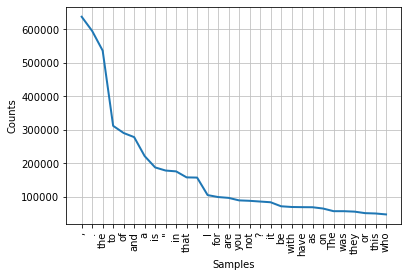

In [55]:
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

In [56]:
import nltk
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))
punkt= [',', '.', '!', '?', '...', '-', '…', "'", "’", ':', '"', '“', '”', '*', '&', 'I']
for x in punkt:
  stopWords.add(x)
print(stopWords)

{'is', 'why', 'over', 'of', 'further', "wasn't", 'should', 'd', 'won', 'from', 'shouldn', 'was', 'your', '*', 'this', 'my', 'which', 'having', "won't", "she's", 'who', 'itself', 'off', "shouldn't", "isn't", 'those', 'we', 'these', '...', 'than', 'ma', 'during', 'don', "you're", 'weren', '&', 'only', 'so', 'haven', '"', 'needn', 'him', 'me', 'they', 'can', 'y', 'hadn', 'at', 'any', "couldn't", ':', 'does', 'all', "mustn't", 'didn', 'yourself', 'same', 'did', 'for', 'wasn', 're', "you'll", 'then', 'being', 'few', "hadn't", 'had', "wouldn't", 'when', 'ain', 'am', "you'd", 'myself', 'mustn', 'between', "needn't", 'before', "you've", 'to', 'it', 'that', 'been', '.', 'their', 'ours', 'doesn', "aren't", 'I', 'himself', 'very', 'here', 'has', 'by', 'other', "shan't", 'yourselves', 'aren', 'with', 'but', 'she', 'on', 'or', 'more', "haven't", '?', 'he', "weren't", 'and', 'not', "should've", '’', 'an', "don't", 've', '…', 'in', 'his', 'about', 'some', 'there', 'have', 'because', 'herself', 't', '

[nltk_data] Downloading package stopwords to /Users/Marta/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Filtering the tweets removing the stop words from the list above

In [57]:
filtered_sent=[]
for w in tweetsString:
    if w not in stopWords:
        filtered_sent.append(w)
print("Tokenized Sentence:",tweetsString)
print("Filtered Sentence:",filtered_sent)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [58]:
fdistNoStop = FreqDist(filtered_sent)
print(fdistNoStop)

<FreqDist with 177412 samples and 6642466 outcomes>


In [59]:
fdistNoStop.most_common(30)

[(' ', 157561),
 ('The', 57239),
 ('people', 41346),
 (')', 40619),
 ('(', 39025),
 ('would', 31421),
 ('white', 30000),
 ('one', 28020),
 ('like', 26775),
 ('It', 20484),
 ('Trump', 20346),
 ('Catholic', 18521),
 ('many', 18081),
 ('think', 17604),
 ('And', 17279),
 ('Church', 17103),
 ('You', 17061),
 ('black', 16371),
 ('know', 16283),
 ('God', 16031),
 ('If', 15784),
 ('us', 15565),
 ('women', 15297),
 ('get', 15212),
 ('even', 14623),
 ('Jesus', 14408),
 ('right', 14067),
 ('time', 13876),
 ('This', 13569),
 ('/', 13313)]

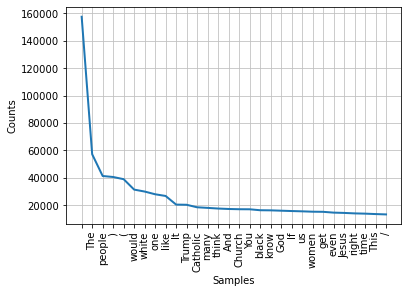

In [60]:
import matplotlib.pyplot as plt
fdistNoStop.plot(30,cumulative=False)
plt.show()

Log of frequencies

In [61]:
fdist.most_common()

[(',', 638075),
 ('.', 595610),
 ('the', 536925),
 ('to', 312144),
 ('of', 290747),
 ('and', 278476),
 ('a', 221829),
 ('is', 187944),
 ('"', 178615),
 ('in', 176112),
 ('that', 158215),
 (' ', 157561),
 ('I', 105298),
 ('for', 99457),
 ('are', 96957),
 ('you', 89464),
 ('not', 88187),
 ('?', 86027),
 ('it', 83901),
 ('be', 71874),
 ('with', 69752),
 ('have', 69256),
 ('as', 68995),
 ('on', 65133),
 ('The', 57239),
 ('was', 57187),
 ('they', 55875),
 ('or', 51366),
 ('this', 50340),
 ('who', 47555),
 ('by', 47430),
 ('their', 46458),
 ('all', 44693),
 ('-', 43584),
 ('people', 41346),
 (')', 40619),
 ('from', 40295),
 ('(', 39025),
 ('about', 38382),
 ('but', 38082),
 ("'", 37383),
 ('we', 36419),
 ('do', 35043),
 ('...', 34668),
 ('has', 34323),
 ('he', 34265),
 ('will', 33572),
 ('what', 33544),
 ('!', 33459),
 ('at', 33062),
 ('an', 32470),
 ('his', 31464),
 ('would', 31421),
 ('your', 31117),
 ('white', 30000),
 ('one', 28020),
 ('no', 27756),
 ('more', 27006),
 ('so', 26887),
 ('l

In [62]:
fdist.N()

13308739

In [63]:
conteggio = []
for key, value in fdist.most_common():
  conteggio.append(value) # append frequenza
freqOfFreq=FreqDist(conteggio) 
freqOfFreq #frequenza - numero di valori che compaiono frequenza volte 

FreqDist({1: 93976, 2: 21046, 3: 10322, 4: 6501, 5: 4527, 6: 3449, 7: 2686, 8: 2302, 9: 1876, 10: 1581, ...})

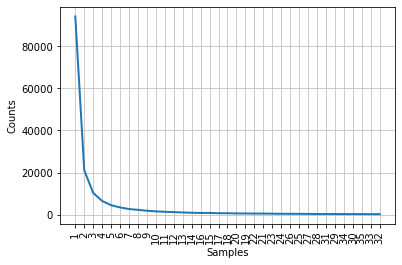

In [64]:
freqOfFreq.plot(35,cumulative=False)
plt.show()  

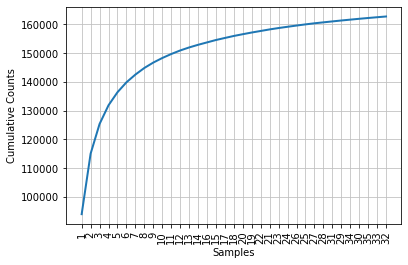

In [65]:
freqOfFreq.plot(35,cumulative=True)
plt.show()  

In [66]:
result = freqOfFreq.keys() 
data = list(result) # Convert object to a list 
numpyArrayKeys = np.array(data) # Convert list to an array 
print(numpyArrayKeys)

[638075 595610 536925 ...      3      2      1]


In [67]:
result = freqOfFreq.values() 
data1 = list(result) # Convert object to a list 
numpyArrayValues = np.array(data1) # Convert list to an array 
print(numpyArrayValues)

[    1     1     1 ... 10322 21046 93976]


The x variable represents the number of times a certain word appears in the text, and the y variable indicates the number of words that appear x times.



```
frequency - number of values appearing frequency times 
```

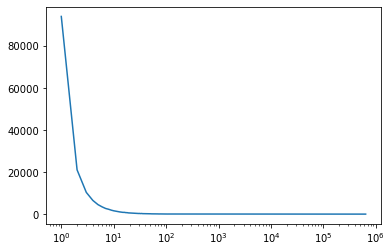

In [68]:
plt.plot(numpyArrayKeys,numpyArrayValues)
plt.xscale('log')
plt.show()

Hashtags

In [69]:
count = 0
hashtags = []
for x in tweets:
  for token in x:
    if '#' in token:
        count+=1
        hashtags.append(token.lower())
print(count)
print(hashtags)

14985
['#lockthemup', '#buildthewall', '#enddaca', '#boycottnfl', '#boycottnike', '#familesbelongtogether', '#nodaca', '#noamnesty', '#sendthe', '#buildthatwall', '#juveniledelinquents', '#sendthemback', '#immigration', '#inhumane', '#refugeeswelcome', '#economic', '#humantrafficking', '#indonesia', '#treason', "#joebiden's", '#whitegenocide', '#immigrationinvasion', '#jessewatters', '#watersworldhttps', '#nodaca', '#noamnesty', '#deportthemall', '#buildthewallamnesty', '#trump', '#refugees', '#stoptheinvasion', '#ilgov', '#twill', '#buildthatwall', '#kag', '#uk', '#brexitnow', '#stopimmigration', '#buildthatwall', '#rohingya', '#myanmar', '#southeastasia', '#eu', '#buildthatwall', '#sasc', '#colga', '#speakup', '#speakout', '#ilgov', '#twill', '#kavanaugh', '#saturdaymotivation', '#usopen2018', '#maga', '#buildthatwall', '#rednationrising', '#walkaway', '#swrm', '#sendthemhome', '#sweden', '#rapists', '#maga', '#kag', '#potus', '#trump', '#news', '#votered', '#nodaca', '#walkaway', '#

In [70]:
fdistHashTags = FreqDist(hashtags)
print(len(fdistHashTags))
fdistHashTags.most_common(30)

3752


[('#buildthatwall', 871),
 ('#maga', 722),
 ('#', 607),
 ('#buildthewall', 472),
 ('#nodaca', 386),
 ('#trump', 284),
 ('#deportthemall', 264),
 ('#sendthemback', 252),
 ('#illegalaliens', 245),
 ('#noamnesty', 218),
 ('#immigration', 201),
 ('#walkaway', 186),
 ('#americafirst', 176),
 ('#kag', 166),
 ('#stoptheinvasion', 140),
 ('#enddaca', 120),
 ('#usa', 110),
 ('#potus', 98),
 ('#refugees', 96),
 ('#votered', 95),
 ('#rednationrising', 92),
 ('#whitegenocide', 89),
 ('#islam', 89),
 ('#news', 83),
 ('#endchainmigration', 74),
 ('#draintheswamp', 64),
 ('#sendthemhome', 60),
 ('#trump2020', 58),
 ('#withrefugees', 49),
 ('#buildthedamnwall', 49)]

Retweets

In [71]:
count = 0
ret = []
for x in tweets:
  for token in x:
    if '@' in token:
        count+=1
        ret.append(token)
print(count)
print(ret)

11500
['@potus', '@realDonaldTrump', '@KamalaHarris', '@KurtSchlichter', '@RitaPanahi', '@8', '@RealCandaceO', '@SBSisters', '@refugeecouncil', '@DocsNotCops', '@ISupport_Israel', '@RealDonaldTrump', '@HouseGOP', '@BreitbartNews', '@NBCNews', '@MSNBC', '@jacobsoboroff', '@DatelineNBC', '@ucanindonesia', '@UNmigration', '@ryandagur', '@WattersWorld', '@JesseBWatters', '@BillSpadea', '@GOPLeader', '@HouseGOP', '@SpeakerRyan', '@ISupport_Israel', '@realDonaldTrump', '@ISupport_Israel', '@dailycaller', '@ISupport_Israel', '@YouTube', '@realDonaldTrump', '@BruceRauner', '@AmyMek', '@Barbara4u2', '@jihadwatchRS', '@RealJamesWoods', '@KingJames', '@SC_Humanitarian', '@save_children', '@MSF', '@UnicefAsiaPac', '@UNmigration', '@theIRC', '@HRWBurma', '@rohingyablogger', '@FortifyRights', '@OpRohingya', '@YouTube', '@BruceRauner', '@liberal_party', '@PressSec', '@realDonaldTrump', '@GenFlynn', '@reba', '@katyperry', '@johnrich', '@pamelageller', '@survivepunish', '@DFBHarvard', '@sriharikaranth'

Counting the values of the class label

In [72]:
df['hate'].value_counts()

0.0    131286
1.0     26275
Name: hate, dtype: int64

Pie chart with percetage per class

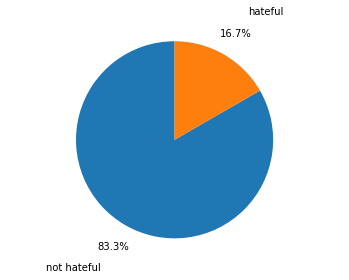

In [73]:
fig1, ax1 = plt.subplots()
ax1.pie(df['hate'].value_counts(), labels=['not hateful','hateful'], autopct='%1.1f%%', startangle=90, pctdistance=1.25, labeldistance=1.5)
ax1.axis('equal')

plt.show()